In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

In [2]:
dataframe = pd.read_csv("train.csv")
dataframe = dataframe.dropna()

In [3]:
def standardScaler_preprocessing(data):
    
    scaler = StandardScaler()
    data[data.columns[:-1]] = scaler.fit_transform(data[data.columns[:-1]])
    
    return data

In [4]:
# 對除了 Label 的特徵做標準化
dataframe = standardScaler_preprocessing(dataframe)

In [5]:
# 切分 data 與 label
x = dataframe[dataframe.columns[:-1]]
y = dataframe[dataframe.columns[-1]]

In [6]:
# Ridge with cross-validation
lasso = RidgeCV().fit(x, y)
importance = np.abs(lasso.coef_)

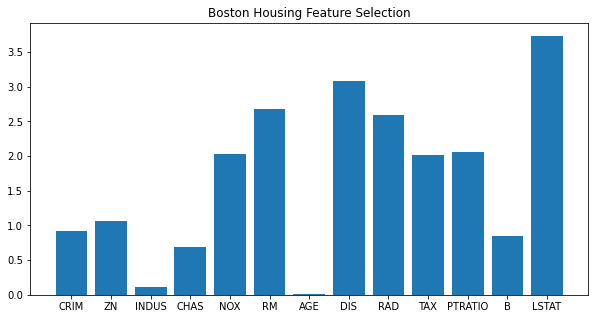

In [7]:
# 列出各參數的 weight，代表其重要性
plt.figure(figsize=(10,5))
plt.bar(height = importance, x = x.columns)
plt.title("Boston Housing Feature Selection")
plt.show()